# Introduction






# Exploratory Data Analysis

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
import wordcloud
import glob

In [2]:
data = pd.read_csv('../data/video_clean.csv', thousands = ',', encoding = 'utf-8')
data[0:5]

,Unnamed: 0,title,view,channel,uploadtime,length,link,subscriber,like,dislike,clean_text
0,0,Unprecedented restrictions in Italy over coron...,22000,CNN,3,498,https://www.youtube.com/watch?v=v_vDjR5zBDk,8710000,735,124,unprecedented restriction italy coronavirus ou...
1,1,New York reels with largest coronavirus outbre...,264000,ABC News,11,237,https://www.youtube.com/watch?v=7JedXOgOPC8,7860000,2082,223,new york reel largest coronavirus outbreak u wnt
2,2,Trump urges calm at coronavirus task force bri...,442000,CBS News,10,351,https://www.youtube.com/watch?v=zSfbAP3emSE,2390000,2610,2208,trump urge calm coronavirus task force briefing
3,3,Governor Cuomo Gives Updates On Coronavirus In...,98000,MSNBC,14,336,https://www.youtube.com/watch?v=06Q1CQd33zM,2420000,711,253,governor cuomo give update coronavirus new yor...
4,4,Coronavirus: Cruise Ship Carrying People With ...,209000,NBC News,10,814,https://www.youtube.com/watch?v=sku3zWvLXnM,1960000,919,101,coronavirus cruise ship carrying people corona...


## Word Frequency

Combine all the titles and count the frequency of the key words at one time

In [3]:
string = data.clean_text.str.split().copy()

#string = string.str.lower()
# np.append(string[1],string[2])
text = []
for i in range(len(data.title.values)):
    text = text + string[i]
text

['unprecedented',
 'restriction',
 'italy',
 'coronavirus',
 'outbreak',
 'new',
 'york',
 'reel',
 'largest',
 'coronavirus',
 'outbreak',
 'u',
 'wnt',
 'trump',
 'urge',
 'calm',
 'coronavirus',
 'task',
 'force',
 'briefing',
 'governor',
 'cuomo',
 'give',
 'update',
 'coronavirus',
 'new',
 'york',
 'katy',
 'tur',
 'msnbc',
 'coronavirus',
 'cruise',
 'ship',
 'carrying',
 'people',
 'coronavirus',
 'dock',
 'california',
 'nbc',
 'nightly',
 'news',
 'growing',
 'fear',
 'response',
 'coronavirus',
 'number',
 'confirmed',
 'case',
 'soar',
 'nbc',
 'nightly',
 'news',
 'fast',
 'moving',
 'development',
 'coronavirus',
 'outbreak',
 'cnn',
 'polled',
 'american',
 'coronavirus',
 'here',
 'said',
 'fmr',
 'obama',
 'economist',
 'trump',
 'coronavirus',
 'payroll',
 'tax',
 'cut',
 'answer',
 'last',
 'word',
 'msnbc',
 'california',
 'governor',
 'gavin',
 'newsom',
 'give',
 'update',
 'coronavirus',
 'outbreak',
 'coronavirus',
 'answering',
 'googled',
 'question',
 'usa',

In [4]:
count1 = Counter(text)

most_c = count1.most_common().copy()
most_c

[('coronavirus', 365),
 ('news', 49),
 ('outbreak', 44),
 ('china', 42),
 ('trump', 24),
 ('covid', 24),
 ('case', 23),
 ('u', 22),
 ('death', 21),
 ('italy', 19),
 ('bbc', 18),
 ('wuhan', 17),
 ('update', 16),
 ('spread', 16),
 ('el', 16),
 ('new', 15),
 ('msnbc', 14),
 ('response', 14),
 ('virus', 12),
 ('en', 11),
 ('nbc', 10),
 ('doctor', 10),
 ('abc', 10),
 ('symptom', 10),
 ('people', 9),
 ('disease', 9),
 ('global', 9),
 ('la', 9),
 ('today', 8),
 ('lockdown', 8),
 ('quarantine', 8),
 ('live', 8),
 ('de', 8),
 ('toll', 8),
 ('first', 8),
 ('pandemic', 8),
 ('expert', 8),
 ('iran', 8),
 ('dw', 7),
 ('rise', 7),
 ('emergency', 7),
 ('patient', 7),
 ('say', 7),
 ('die', 7),
 ('del', 7),
 ('que', 7),
 ('give', 6),
 ('cruise', 6),
 ('california', 6),
 ('fear', 6),
 ('confirmed', 6),
 ('question', 6),
 ('official', 6),
 ('market', 6),
 ('cdc', 6),
 ('dr', 6),
 ('panic', 6),
 ('corona', 6),
 ('explains', 6),
 ('hour', 6),
 ('talk', 6),
 ('life', 6),
 ('need', 6),
 ('know', 6),
 ('deuts

We remove single letter from the tokens since it has no meanings, but we will not remove two-letter tokens from the list because it may be confused with abbrevations.\
Such as: `LA`(Los Angeles) and `la` (Spanish, the)

Obviously there is some Spanish and other language in the token set.

In [5]:
for i in reversed(range(0,len(most_c)-1)):
    if len(most_c[i][0]) == 1:
        print(most_c[i],i)
        most_c.remove(most_c[i])

('v', 1) 549
('b', 1) 448
('e', 5) 81
('l', 5) 79
('u', 22) 7


In [6]:
for i in reversed(range(0,len(most_c)-1)):
    if len(most_c[i][0]) == 2:
        print(most_c[i],i)
most_c.remove(most_c[13])

('nd', 1) 1020
('pt', 1) 993
('hd', 1) 966
('rb', 1) 917
('ba', 1) 898
('su', 1) 888
('si', 1) 879
('au', 1) 773
('pa', 1) 761
('mi', 1) 760
('yo', 1) 758
('br', 1) 750
('im', 1) 743
('di', 1) 734
('tv', 1) 713
('zu', 1) 679
('mp', 1) 430
('ap', 1) 404
('dc', 1) 370
('ny', 1) 364
('go', 1) 346
('lo', 2) 300
('do', 2) 298
('le', 2) 293
('st', 2) 265
('dy', 2) 225
('pm', 2) 217
('qu', 3) 160
('al', 3) 156
('un', 3) 151
('da', 3) 143
('qa', 3) 117
('th', 4) 87
('uk', 4) 85
('se', 5) 72
('dr', 6) 54
('dw', 7) 37
('de', 8) 31
('la', 9) 26
('en', 11) 18
('el', 16) 13


In [7]:
most_c_50 = most_c[1:30]

Since `Coronavirus` is searched as the key word, it has the highest frequency. We need to look at the frequency of other tokens except the word `coronavirus`.

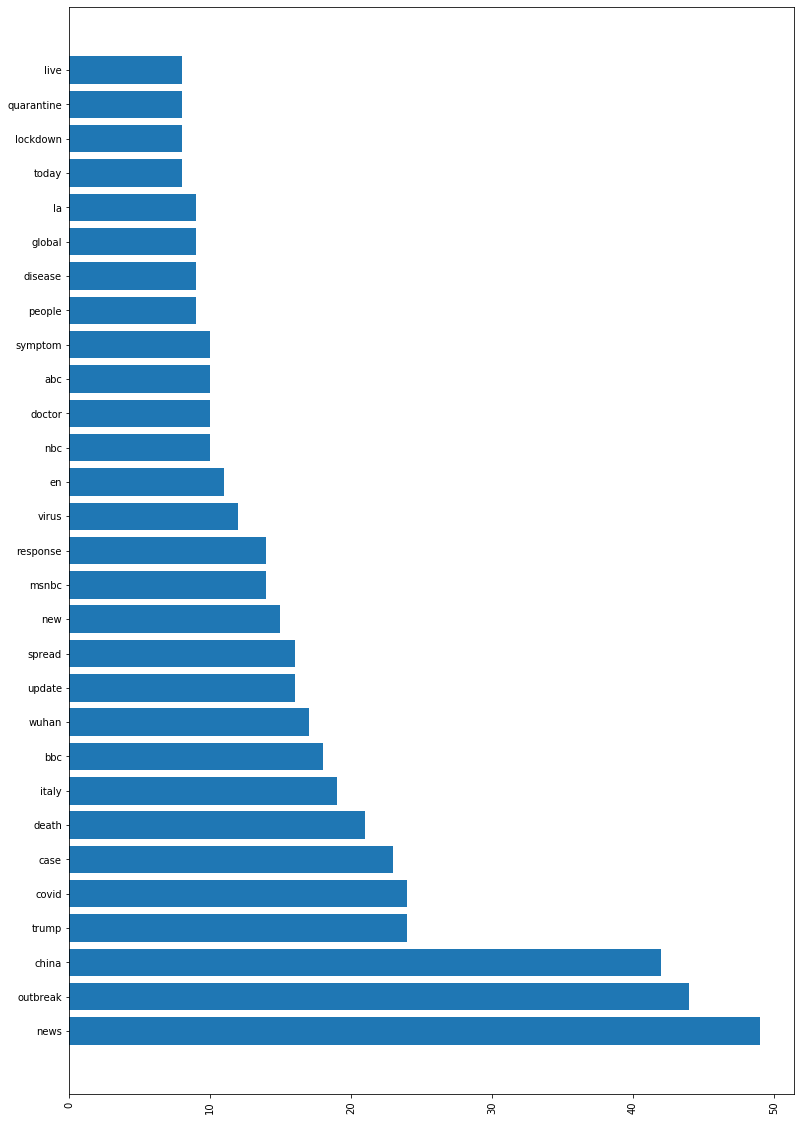

In [8]:
plt.figure(figsize=(13,20))

names, values = zip(*most_c_50)  
plt.barh(names,values)
plt.xticks(rotation=90)
plt.show()


# Who has the most subscribers (roughly)?

In [9]:
data1 = data[['channel','subscriber']].copy()
data1 = data1.drop_duplicates().copy()
data1 = data1.sort_values(by='subscriber',ascending = False).copy()
data1[:10]

,channel,subscriber
256,Luisito Comunica,30100000
24,BuzzFeedVideo,20000000
127,Jimmy Kimmel Live,16300000
52,The Lallantop,12000000
53,Saturday Night Live,9910000
254,AsapSCIENCE,9140000
0,CNN,8710000
26,ABS-CBN News,8480000
80,BBC,8150000
1,ABC News,7860000


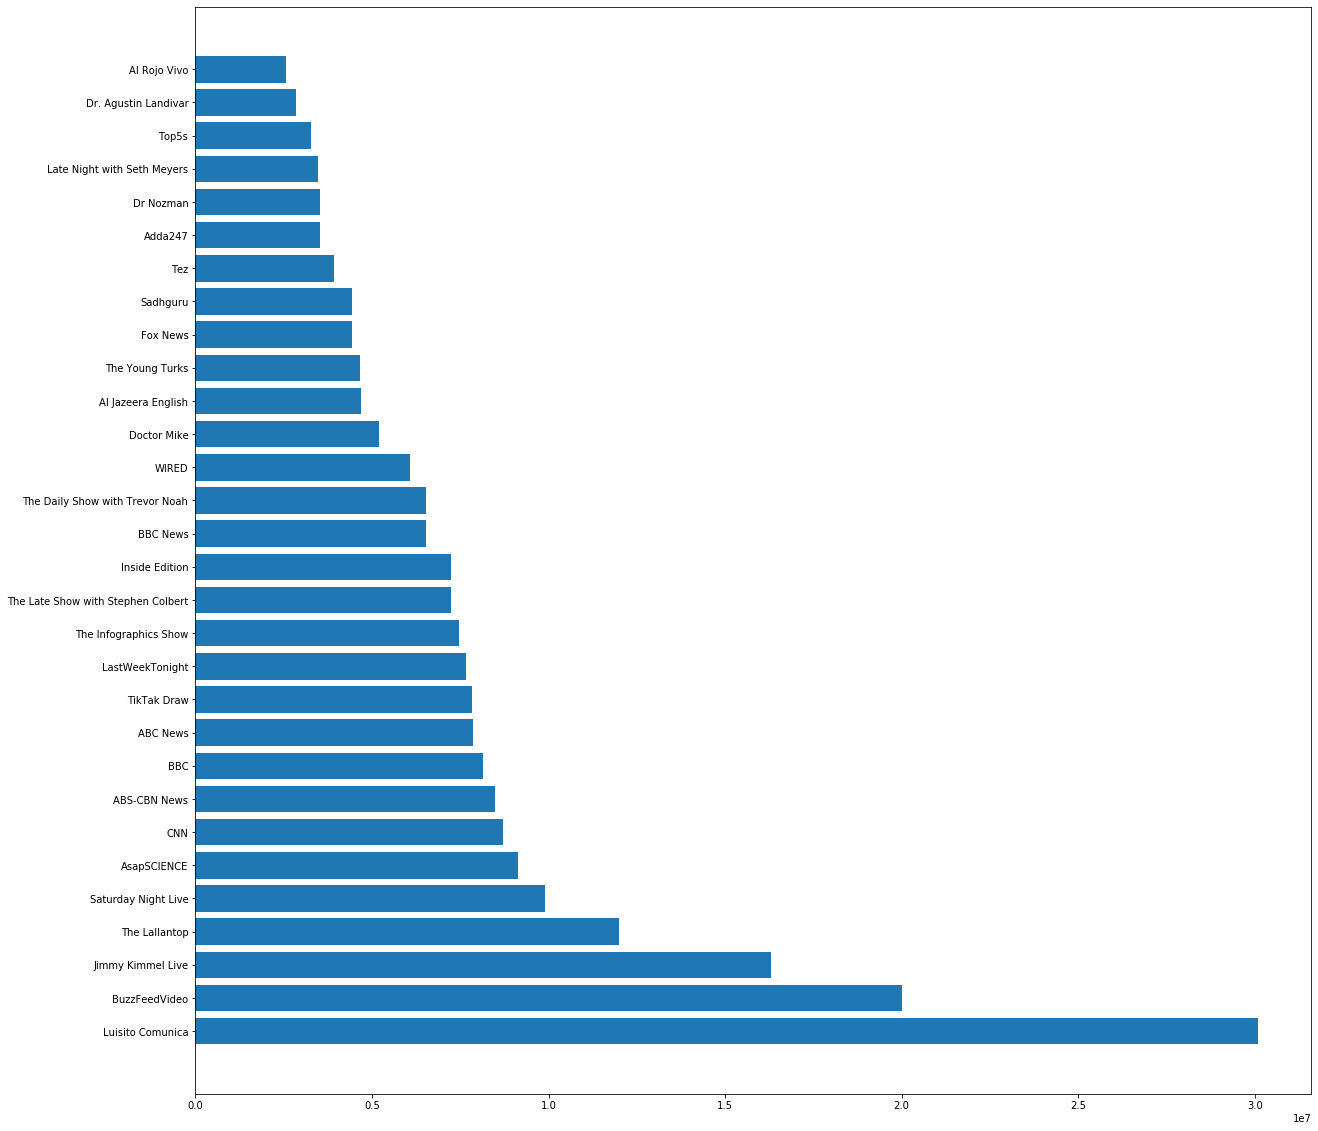

In [38]:
plt.figure(figsize=(20,20))

plt.barh(data1.channel[0:30],data1.subscriber[0:30])

plt.show()

* Traditional International News Stations
* Personal vlogger ('Luisito Comunica')
* New Media
* Talk shows

# Who post the most number of videos about coronavirus?

For the first 30 uploaders

In [36]:
#plt.figure(figsize=(20,15))
data['channel1'] = 'Others'


data['channel'].values

data['channel'].value_counts()[0:30].index

for i in range(len(data['channel'].values)-1): # process data to make the plot readable
    if data.loc[i,'channel'] in data['channel'].value_counts()[0:30].index:
        data.loc[i,'channel1'] = data.loc[i,'channel']
        
#data['channel'].value_counts().plot(kind='pie')

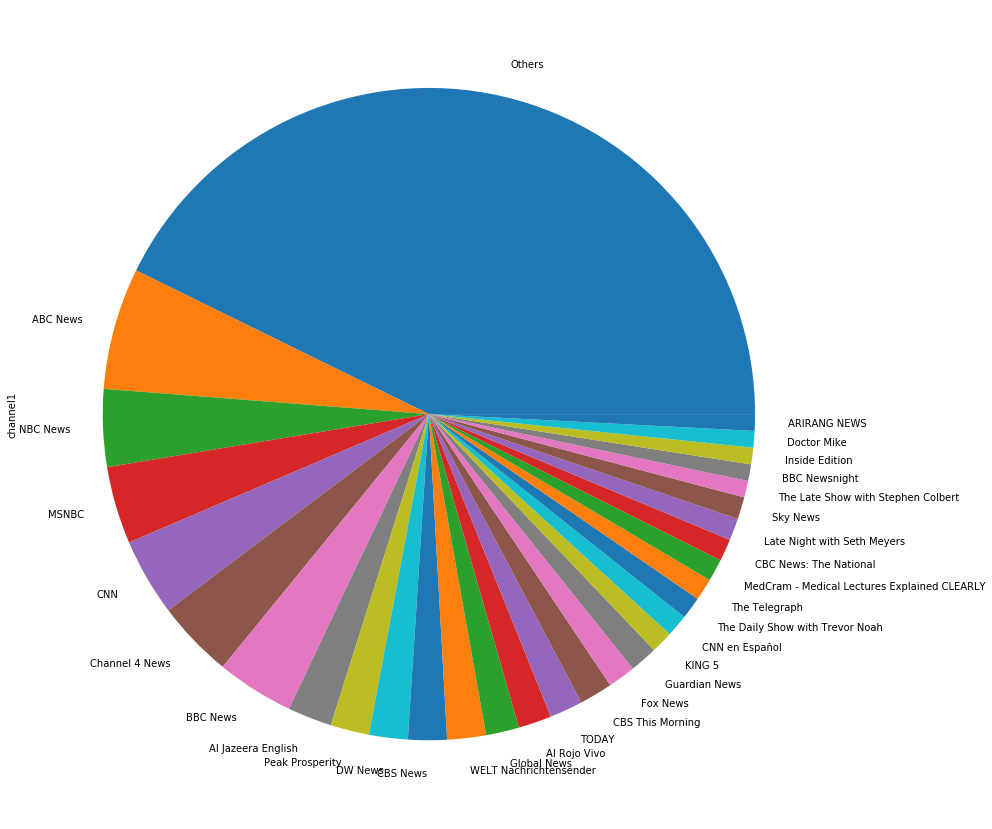

In [37]:
plt.figure(figsize=(20,15))
data['channel1'].value_counts().plot(kind='pie')

# Who provided the contents with longest duration?

In [ ]:
tot_len = data.groupby('channel', as_index=False).agg({"length": "sum"}).copy()
tot_len = tot_len.sort_values('length',ascending = False)
tot_len

In [ ]:
plt.figure(figsize=(20,15))
plt.barh(tot_len['channel'][0:20],tot_len['length'][0:20])

Extremely long contents
* Live Stream

# What is happening in March 14 comparing to 4 days earlier

In [ ]:
data2 = pd.read_csv('../data/video_clean2.csv', thousands = ',', encoding = 'utf-8')
string2 = data2.clean_text.str.split().copy()

text2 = []
for i in range(len(data2.title.values)):
    text2 = text2 + string2[i]
text2

In [ ]:
count2 = Counter(text2)

most_c_2 = count2.most_common().copy()
most_c_2

In [ ]:
for i in reversed(range(0,len(most_c_2)-1)):
    if len(most_c_2[i][0]) == 1:
        print(most_c_2[i],i)
        most_c_2.remove(most_c_2[i])

In [ ]:
wc = wordcloud.WordCloud(width = 1000,max_words=500, height = 500,background_color="white",
                          collocations = True,relative_scaling=0.2).generate_from_frequencies(dict(most_c[1:60]))
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
wc2 = wordcloud.WordCloud(width = 1000,max_words=500, height = 500,background_color="white",
                          collocations = True,relative_scaling=0.2).generate_from_frequencies(dict(most_c_2[1:60]))
plt.figure(figsize=(20,10))
plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")
plt.show()

# Question: how the views increase over time?

## - Question Description: 

For a specific video, we are interested in the how the view increase with time 


In [115]:
filenames = glob.glob("../data/clean/*.csv")
files = [i.split('/')[3] for i in filenames]
filenamelist = [i.split('.')[0] for i in files]
filenamelist = np.sort(filenamelist)
filenamelist

array(['video_03122020_131055_clean', 'video_03122020_162930_clean',
       'video_03122020_194857_clean', 'video_03132020_020920_clean',
       'video_03132020_052811_clean', 'video_03132020_084652_clean',
       'video_03132020_120531_clean', 'video_03132020_184202_clean',
       'video_03132020_220046_clean', 'video_03142020_011950_clean',
       'video_03142020_043854_clean', 'video_03142020_075258_clean',
       'video_03142020_143324_clean', 'video_03142020_175505_clean',
       'video_03142020_211654_clean', 'video_03152020_003817_clean',
       'video_03152020_035739_clean'], dtype='<U27')

In [116]:
name = '../data/clean/'+ filenamelist[-1] + '.csv'
videodata = pd.read_csv(name, thousands = ',', encoding = 'utf-8')
videodata.head()

,Unnamed: 0,title,view,channel,uploadtime,length,link,subscriber,like,dislike,clean_text
0,0,President Trump tests negative for coronavirus...,393000,CNN,11,394,https://www.youtube.com/watch?v=eOB-z-g9v74,8770000,3191,2244,president trump test negative coronavirus whit...
1,1,Coronavirus outbreak: Case numbers rise in Can...,105000,Global News,9,378,https://www.youtube.com/watch?v=MUPJEtAJip4,1250000,651,80,coronavirus outbreak case number rise canada h...
2,2,Will Coronavirus Outbreak Impact 2020 Election...,92000,MSNBC,15,417,https://www.youtube.com/watch?v=IkjSVMcM4mA,2450000,1207,175,coronavirus outbreak impact election joy msnbc
3,3,Coronavirus: 'Get prepared as soon as you can'...,1000000,Sky News,15,572,https://www.youtube.com/watch?v=61-gFtHJOd8,1900000,11762,425,coronavirus get prepared soon say italian doctor
4,4,WATCH LIVE: Trump gives coronavirus update,571000,Washington Post,15,13300,https://www.youtube.com/watch?v=yH4cp4dssGw,1000000,3611,1513,watch live trump give coronavirus update


In [135]:
# get the most viewed video title
title = videodata.loc[videodata['view'].idxmax(),'clean_text']
title

'serious coronavirus infectious disease expert michael osterholm explains joe rogan'

In [156]:
columns = list(videodata.columns)
columns.append('filetime')
columns

['Unnamed: 0',
 'title',
 'view',
 'channel',
 'uploadtime',
 'length',
 'link',
 'subscriber',
 'like',
 'dislike',
 'clean_text',
 'filetime']

In [169]:
videos = pd.DataFrame(columns = columns)
for i in filenamelist:
    name = '../data/clean/'+ i + '.csv'
    videodata = pd.read_csv(name, thousands = ',', encoding = 'utf-8')
    sample = videodata[videodata['clean_text']==title]
    if len(sample) == 0:
        print(i)
        continue
        
    date = int(i.split('_')[1][2:4]) #date
    hour = int(i.split('_')[2][0:2])
    minute = int(i.split('_')[2][2:4])

    time = (date-12)*24 + hour + minute/60
    sample = sample.assign(filetime = [time]) 
    videos = videos.append(sample)
videos.shape

video_03132020_220046_clean
video_03142020_043854_clean
video_03152020_003817_clean


(14, 12)

In [175]:
videos.head()

,Unnamed: 0,title,view,channel,uploadtime,length,link,subscriber,like,dislike,clean_text,filetime
273,273,How Serious is the Coronavirus? Infectious Dis...,11000000,JRE Clips,48,929,https://www.youtube.com/watch?v=cZFhjMQrVts,3940000,187970,6563,serious coronavirus infectious disease expert ...,13.166667
161,161,How Serious is the Coronavirus? Infectious Dis...,12000000,JRE Clips,48,929,https://www.youtube.com/watch?v=cZFhjMQrVts,3940000,194768,6822,serious coronavirus infectious disease expert ...,16.483333
189,189,How Serious is the Coronavirus? Infectious Dis...,13000000,JRE Clips,48,929,https://www.youtube.com/watch?v=cZFhjMQrVts,3950000,200989,7061,serious coronavirus infectious disease expert ...,19.800000
290,290,How Serious is the Coronavirus? Infectious Dis...,14000000,JRE Clips,48,929,https://www.youtube.com/watch?v=cZFhjMQrVts,3950000,208357,7394,serious coronavirus infectious disease expert ...,26.150000
285,285,How Serious is the Coronavirus? Infectious Dis...,14000000,JRE Clips,48,929,https://www.youtube.com/watch?v=cZFhjMQrVts,3950000,211457,7515,serious coronavirus infectious disease expert ...,29.466667


In [195]:
np.log(videos['view'].values.astype(int))

array([16.21340583, 16.30041721, 16.38045992, 16.45456789, 16.45456789,
       16.45456789, 16.52356076, 16.58809928, 16.58809928, 16.58809928,
       16.6487239 , 16.6487239 , 16.70588232, 16.70588232])

Text(0, 0.5, 'Counts')

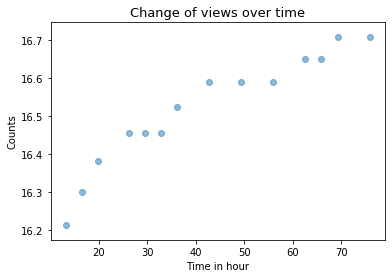

In [204]:
logview = np.log(videos['view'].values.astype(int))
like = (videos['like'].values.astype(int))
likeoview = (videos['like'].values.astype(int))/(videos['view'].values.astype(int))
plt.scatter(videos['filetime'].values,logview, alpha=0.5)
#plt.scatter(videos['filetime'].values,likeoview, alpha=0.5)
            
plt.title('Change of views over time', size=13)
plt.xlabel('Time in hour', size=10)
plt.ylabel('Counts', size=10)
#plt.legend(labels=['views','likes'])                           
                                       

Text(0, 0.5, 'Counts')

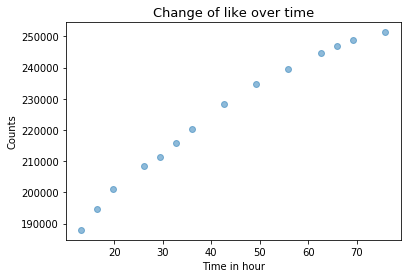

In [205]:
plt.scatter(videos['filetime'].values,like, alpha=0.5)

            
plt.title('Change of like over time', size=13)
plt.xlabel('Time in hour', size=10)
plt.ylabel('Counts', size=10)
#plt.legend(labels=['views','likes'])  

Text(0, 0.5, 'Counts')

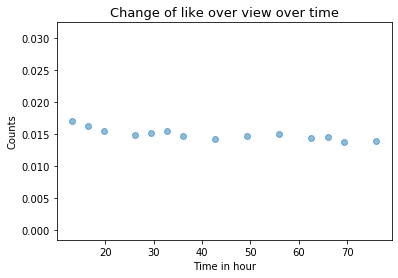

In [207]:
plt.scatter(videos['filetime'].values,likeoview, alpha=0.5)

            
plt.title('Change of ratio of like over view over time', size=13)
plt.xlabel('Time in hour', size=10)
plt.ylabel('Counts', size=10)